In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("kmean.csv")

In [2]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
sc=StandardScaler()
x=sc.fit_transform(df)

C:\Users\FPT SHOP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FPT SHOP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FPT SHOP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FPT SHOP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

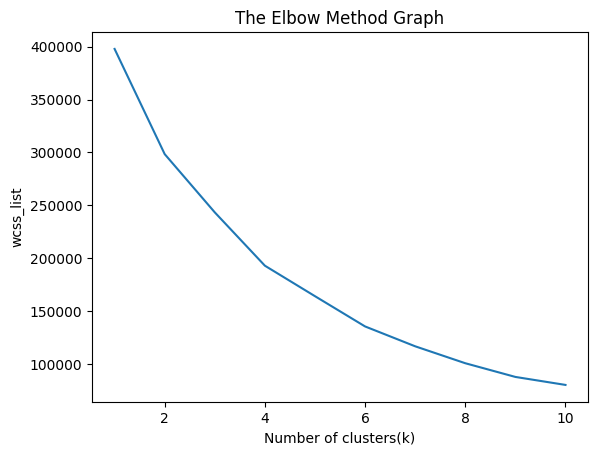

In [3]:
#KMeans cluster method
from sklearn.cluster import KMeans
wcc_list=[]
for i in range(1,11):
    knn=KMeans(n_clusters=i,init='k-means++',random_state=42)
    knn.fit(x)
    wcc_list.append(knn.inertia_)
    labels = knn.labels_
    
plt.plot(range(1, 11), wcc_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [4]:
from sklearn.cluster import KMeans
knn=KMeans(n_clusters=4,init='k-means++')
knn.fit(x)

C:\Users\FPT SHOP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [5]:
df["Cluster_No"] = knn.labels_

In [6]:
df.groupby(["Cluster_No"]).mean()

,gender,age,category,total_price
Cluster_No,,,,
0,0.00000,43.502558,4.085325,355.732541
1,0.00000,43.424847,0.187824,3531.807502
2,1.00000,43.376015,2.319481,1788.071267
3,0.40824,43.357086,3.996616,16487.192526


In [7]:
df["Cluster_No"].value_counts()

2    37924
0    31081
1    25428
3     5024
Name: Cluster_No, dtype: int64

In [8]:
df_clp = df.groupby(['Cluster_No']).agg({
    'category': lambda x:x.mode().iloc[0] ,
    'total_price': 'sum',
    'gender': 'mean',
    'age': 'mean'
}).reset_index()

df_clp

,Cluster_No,category,total_price,gender,age
0,0,3,11056523.12,0.00000,43.502558
1,1,0,89806801.15,0.00000,43.424847
2,2,0,67810814.73,1.00000,43.376015
3,3,6,82831655.25,0.40824,43.357086


In [9]:
print(df_clp[df_clp["Cluster_No"] == 1]["gender"].iloc[0])

0.0


In [10]:
df_cl = df.groupby(['Cluster_No', 'category']).size().reset_index(name="cat_count")

In [11]:
df_cl

,Cluster_No,category,cat_count
0,0,2,2906
1,0,3,9070
2,0,4,8804
3,0,5,6085
4,0,6,1199
5,0,7,3017
6,1,0,20652
7,1,1,4776
8,2,0,13835
9,2,1,3245


In [12]:
# Mapping dictionary
category_mapping = {
    0: 'Books',
    1: 'Clothing',
    2: 'Cosmetics',
    3: 'Food & Beverage',
    4: 'Shoes',
    5: 'Souvenir',
    6: 'Technology',
    7: 'Toys'
}


# Apply the mapping to the 'category' column
df_cl['category'] = df_cl['category'].map(category_mapping)

df_cl

,Cluster_No,category,cat_count
0,0,Cosmetics,2906
1,0,Food & Beverage,9070
2,0,Shoes,8804
3,0,Souvenir,6085
4,0,Technology,1199
5,0,Toys,3017
6,1,Books,20652
7,1,Clothing,4776
8,2,Books,13835
9,2,Clothing,3245


In [13]:
cluster_mapping = {
    0: 'gender =' + str(round(df_clp[df_clp["Cluster_No"] == 0]["gender"].iloc[0],1)) + ',' + 'age =' + str(round(df_clp[df_clp["Cluster_No"] == 0]["age"].iloc[0],1)),
    1: 'gender =' + str(round(df_clp[df_clp["Cluster_No"] == 1]["gender"].iloc[0],1)) + ',' + 'age =' + str(round(df_clp[df_clp["Cluster_No"] == 1]["age"].iloc[0],1)),
    2: 'gender =' + str(round(df_clp[df_clp["Cluster_No"] == 2]["gender"].iloc[0],1)) + ',' + 'age =' + str(round(df_clp[df_clp["Cluster_No"] == 2]["age"].iloc[0],1)),
    3: 'gender =' + str(round(df_clp[df_clp["Cluster_No"] == 3]["gender"].iloc[0],1)) + ',' + 'age =' + str(round(df_clp[df_clp["Cluster_No"] == 3]["age"].iloc[0],1))
}
df_cl['Cluster_No'] = df_cl['Cluster_No'].map(cluster_mapping)


In [14]:
df_cl

,Cluster_No,category,cat_count
0,"gender =0.0,age =43.5",Cosmetics,2906
1,"gender =0.0,age =43.5",Food & Beverage,9070
2,"gender =0.0,age =43.5",Shoes,8804
3,"gender =0.0,age =43.5",Souvenir,6085
4,"gender =0.0,age =43.5",Technology,1199
5,"gender =0.0,age =43.5",Toys,3017
6,"gender =0.0,age =43.4",Books,20652
7,"gender =0.0,age =43.4",Clothing,4776
8,"gender =1.0,age =43.4",Books,13835
9,"gender =1.0,age =43.4",Clothing,3245


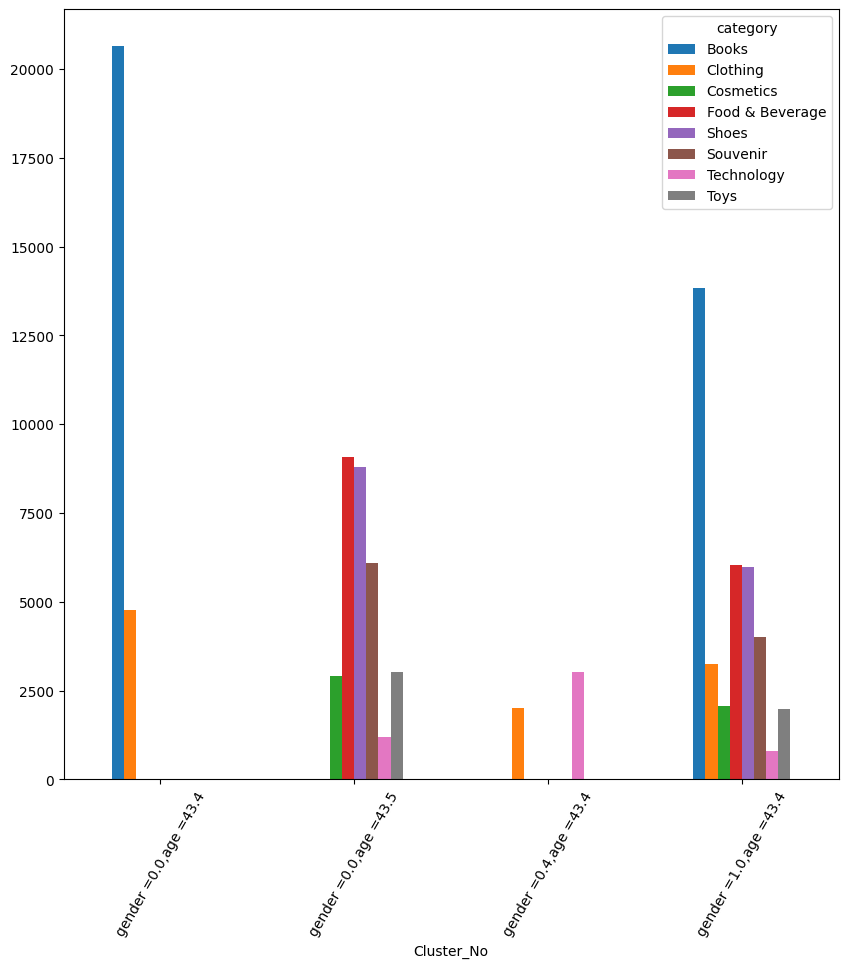

In [15]:
import matplotlib.pyplot as plt
pivot_table = df_cl.pivot_table(index="Cluster_No", columns="category", values="cat_count")
pivot_table.plot(kind='bar', figsize=(10, 10))
plt.xticks(rotation=60)
plt.show()

In [16]:
df_clp["Cluster_No"] = df_clp["Cluster_No"].map(cluster_mapping)

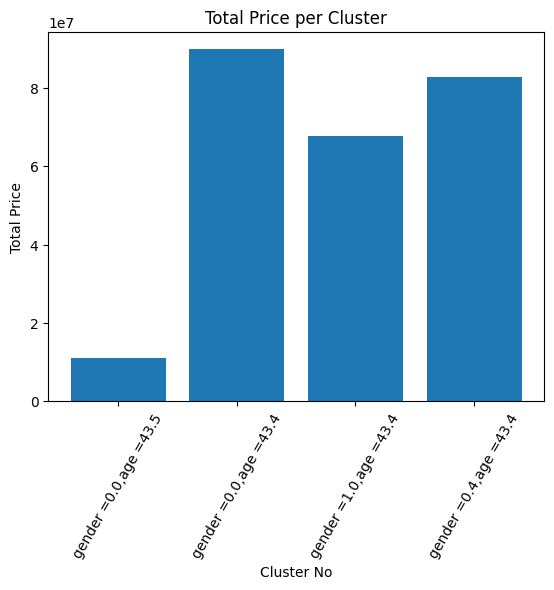

In [17]:
plt.bar(df_clp["Cluster_No"], df_clp["total_price"])
plt.xlabel('Cluster No')
plt.ylabel('Total Price')
plt.title('Total Price per Cluster')
plt.xticks(rotation=60)
plt.show()

In [ ]:
df["Cluster_No"] = df["Cluster_No"].map(cluster_mapping)

In [ ]:
a = df["Cluster_No"].value_counts()
a

gender =1.0,age =43.3    34306
gender =0.0,age =43.5    31655
gender =0.0,age =43.4    25428
gender =0.7,age =43.6     8068
Name: Cluster_No, dtype: int64

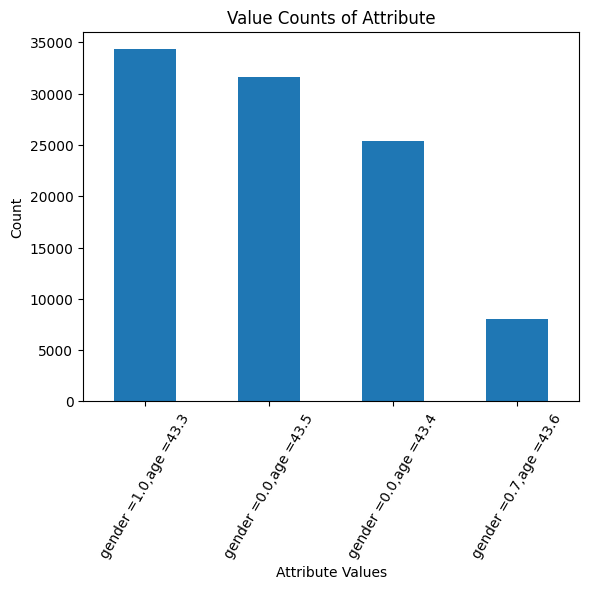

In [ ]:
attribute_counts = df['Cluster_No'].value_counts()

# Plotting the bar plot
attribute_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Attribute Values')
plt.ylabel('Count')
plt.title('Value Counts of Attribute')
plt.xticks(rotation=60)
# Display the plot
plt.show()